In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve,f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
path = '/content/data.csv'
data = pd.read_csv(path)

In [3]:
data.shape

(569, 33)

In [4]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
229,881861,M,12.830,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.068610,...,30.15,105.30,706.0,0.17770,0.53430,0.62820,0.19770,0.3407,0.12430,NaN
304,89296,B,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,...,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,NaN
84,8612080,B,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,...,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924,NaN
188,874662,B,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,...,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576,NaN
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,...,35.64,113.20,848.7,0.14710,0.28840,0.37960,0.13290,0.3470,0.07900,NaN
434,908469,B,14.860,16.94,94.89,673.7,0.08924,0.07074,0.033460,0.028770,...,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827,NaN
307,89346,B,9.000,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,NaN
289,89143601,B,11.370,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.021730,...,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.000000,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,NaN
232,88203002,B,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop(['Unnamed: 32','id'],axis = 1,inplace = True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


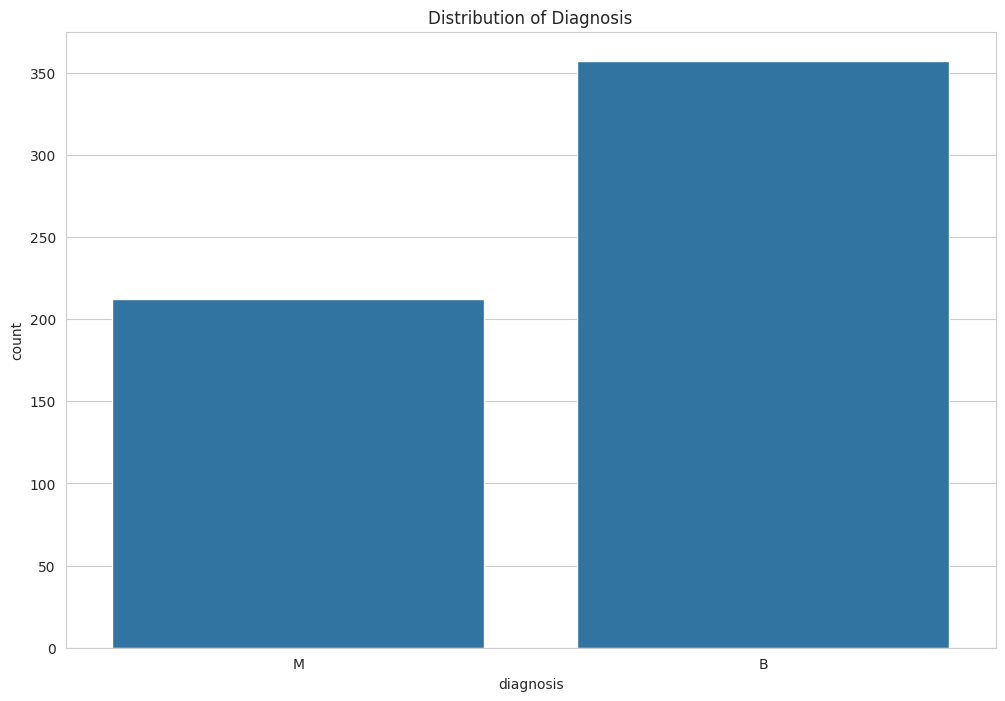

In [11]:
sns.countplot(x='diagnosis',data=data)
plt.title("Distribution of Diagnosis")
plt.show()

In [12]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
print(le.classes_)

['B' 'M']


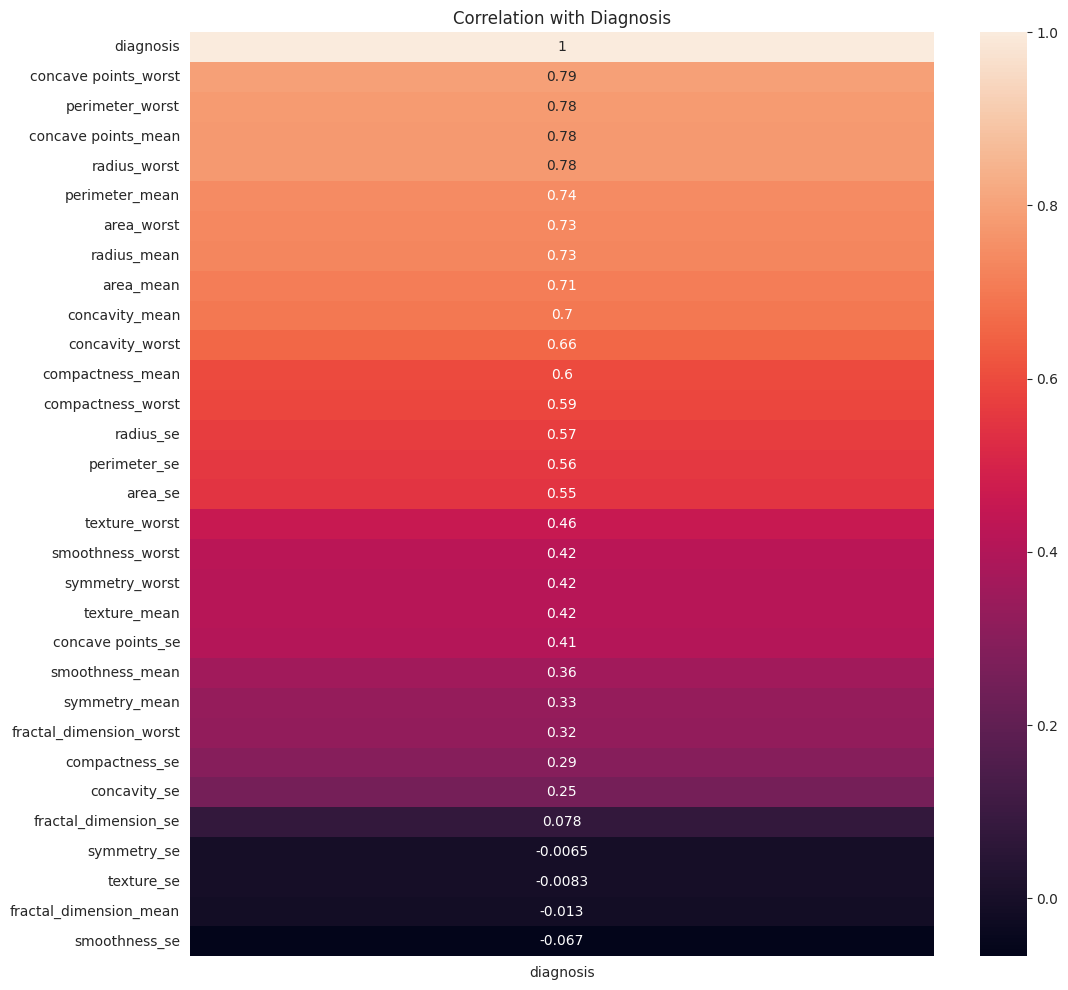

In [13]:
plt.figure(figsize=(12,12))
correlation = data.corr()
sns.heatmap(correlation[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

**SVM**

In [14]:
# Encode target: 'M' -> 1, 'B' -> 0
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

In [15]:
# Separate features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
kernels = ['linear', 'poly', 'rbf']

# Evaluate each kernel
for kernel in kernels:
    print(f"\n--- SVM with {kernel.upper()} Kernel ---")

    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


--- SVM with LINEAR Kernel ---
Accuracy: 0.9561
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- SVM with POLY Kernel ---
Accuracy: 0.8684
Confusion Matrix:
[[71  0]
 [15 28]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.83      1.00      0.90        71
   Malignant       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


--- SVM with RBF Kernel ---
Accuracy: 0.9825
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision 

In [20]:
# Train the best model again (RBF kernel)
best_model = SVC(kernel='rbf', probability=True, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC/PR curves

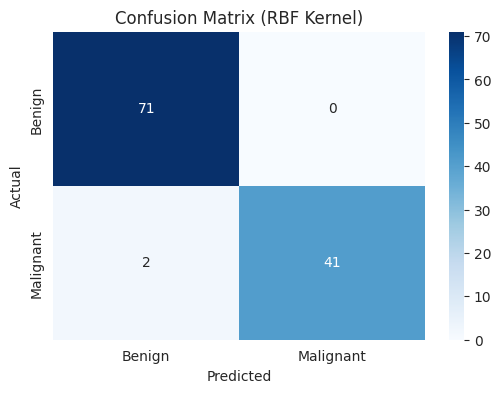

In [21]:
# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Neural Network**

In [44]:
# ---------- Load & Preprocess ----------
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# ---------- Function to Train & Evaluate ----------
def train_and_evaluate(activation_fn):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_fn))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)

    return {
        'activation': activation_fn,
        'accuracy': acc,
        'f1_score': f1,
        'confusion_matrix': cm,
        'history': history,
        'classification_report': report
    }

In [48]:
# ---------- Run for Each Activation ----------
results = []
for activation in ['relu', 'sigmoid', 'tanh']:
    results.append(train_and_evaluate(activation))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


In [49]:
# ---------- Show Results Summary ----------
print("\n Comparison Summary:\n")
for res in results:
    print(f"Activation: {res['activation']}")
    print(f" - Accuracy: {res['accuracy']:.4f}")
    print(f" - F1 Score: {res['f1_score']:.4f}")
    print(f" - Confusion Matrix:\n{res['confusion_matrix']}")
    print("")


 Comparison Summary:

Activation: relu
 - Accuracy: 0.9825
 - F1 Score: 0.9762
 - Confusion Matrix:
[[71  0]
 [ 2 41]]

Activation: sigmoid
 - Accuracy: 0.9912
 - F1 Score: 0.9882
 - Confusion Matrix:
[[71  0]
 [ 1 42]]

Activation: tanh
 - Accuracy: 0.9825
 - F1 Score: 0.9767
 - Confusion Matrix:
[[70  1]
 [ 1 42]]



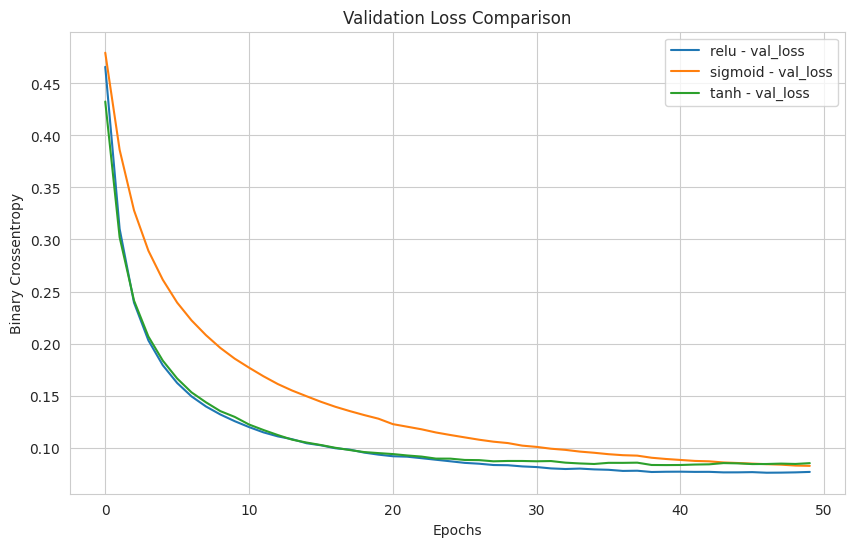

In [50]:
# ---------- Plot Loss Curves ----------
plt.figure(figsize=(10, 6))
for res in results:
    plt.plot(res['history'].history['val_loss'], label=f"{res['activation']} - val_loss")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# --- SVM Probabilities ---
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

In [52]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
nn_probs = nn_model.predict(X_test).ravel()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [53]:
# --- ROC Curve ---
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nn = auc(fpr_nn, tpr_nn)

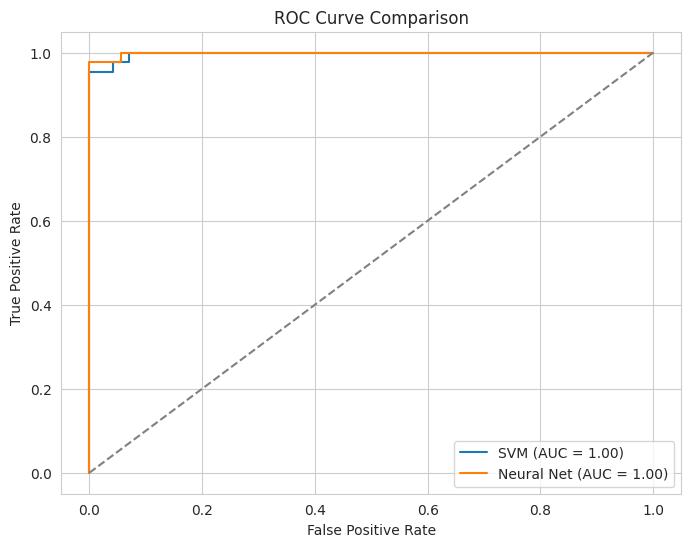

In [54]:
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Net (AUC = {roc_auc_nn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()